<a href="https://colab.research.google.com/github/Nomade25/Mackenzie/blob/main/Regress%C3%A3o_Medindo_MSE%20e%20r2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade 3: Abaixo iremos rodar 5 modelos de ajuste sobre o data set SalePrice usando o metodo de regressão linear, com isso vamos obter o melhor MSE e R2, foram aplicado os seguintes ajustes:

In [ ]:
# Modelo 1 tratamento de valores vazios ou  nulos substituido por mediana
# Modelo 2  com tratamento de valores vazios subitituido por média simples
# Modelo 3 utilizado o modelo tratato acima e aplicado o processo dummies de one hot enconding
# Modelo 4 utilizado o modelo 2 que foi excluido valores vazios e utilizado o modelo de z-score
# Modelo 5 aplicado correlação sobre o modelo 3 ajustado


In [ ]:
# Aqui vamos importar as bibliotecas
import warnings
warnings.filterwarnings ("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Lendo o arquivo price disponibilizado para analise
data_house = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Arquivos/train.csv") 

In [ ]:
# O que temos no arquivo?
data_house.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# quais as colunas com valores vazios ou nulos?

(data_house.isnull().sum()).sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [ ]:
# Vamos dropar as colunas que contém qtd alta de nulos e  Id que é irrelevante
# essa aplicação sera dada para todos os dataframes
data_house = data_house.drop(['PoolQC','MiscFeature','Alley','Fence','Id','FireplaceQu','LotFrontage'],axis=1)

In [ ]:
data_house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# como ficou  agora:
# deixamos 5 atributos com valores de até 81 linhas vazias ou nulas

(data_house.isnull().sum()).sort_values(ascending=False)

GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
                 ..
1stFlrSF          0
CentralAir        0
HeatingQC         0
SaleCondition     0
MSSubClass        0
Length: 74, dtype: int64

In [ ]:
# No comando abaixo podemos indentificar que algumas colunas ainda possuem
# uma quantidade de ocorrencias menor que 1460, aplicado melhorias nesse dataframe
data_house.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Criando o dataset 1
# Na criaçao do dataset 1 não iremos excluir essas colunas que possuem poucos valores
# ausentes iremos pegar os atributos numerico e decimal
# e aplicar a mediana nos valores ausentes.
dataset_house01 = data_house.fillna(data_house.median)
dataset_house01 = dataset_house01.select_dtypes(include=['int64','float64'])
dataset_house01.shape



(1460, 34)

In [ ]:
# Podemos ver agora que todas as features númericas estão em linha em relação a valores nulos
(dataset_house01.isnull().sum()).sort_values(ascending=False)

SalePrice        0
BsmtUnfSF        0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF2       0
YrSold           0
BsmtFinSF1       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
MSSubClass       0
dtype: int64

In [ ]:
# Para o dataset 2 iremos aplicar a mesma regra acima entretanto
# agora utilizaremos média para ver como fica em relação a mediana do modelo acima


dataset_house02 = data_house.fillna(data_house.mean)
dataset_house02 = dataset_house02.select_dtypes(include=['int64','float64'])

In [ ]:
# Para o dataset 3 iremos utilizar o método One Hot enconding para remover outliers
# Quantidade de feateures atual
# (1460, 76)
dataset_house03 = data_house
#dataset_house03 = dataset_house03.select_dtypes(include=['int64','float64'])
dataset_house03.shape 

(1460, 74)

In [ ]:
# Após a aplicação abaixo do enconding aumentamos em 200 colunas conforme o exemplo abaixo
dataset_house03 = pd.get_dummies(data_house)

dataset_house03.shape

(1460, 270)

In [ ]:
# Conforme podemos obeservar no dataset abaixo ele tranformou essas colunas
# em valores numericos ou categorico ordinal
# onde continha valores categoricos
dataset_house03.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# agora vamos para o DATASET 04 e utilizar o z-score (desvio padrão) aplicado ao modelo 01 tratado anteriormente

numerico = dataset_house01.select_dtypes(include=['int64','float64'])

from scipy import stats

z= np.abs(stats.zscore(numerico))

dataset_house01.shape


(1460, 34)

In [ ]:
# Criando o dataset 4 e passando o parametro que o valor do desvio permitido para cada
# instancia seja menor que 3 desvios
dataset_house01 = dataset_house01[(z < 3).all(axis=1)]

dataset_house04 = dataset_house01
dataset_house04 = dataset_house04.select_dtypes(include=['int64','float64'])


In [ ]:
# podemos indentificar abaixo que de 1460 tuplas agora temos 1037 que serão consideradas dentro
# do desvio padrão máx 3 amostras
dataset_house04.shape


(1037, 34)

In [ ]:
# agora vamos utilizar o modelo de correlação para criar o dataset05
# Para esse caso foi pego o modelo que rodou o one hot enconding para considerar
# todas as features transformadas tem uma relevancia maior pra correlação 
# Vamos rodar o comando abaixo para ver a correlação de todas variáveis

corr = dataset_house03.corr () [["SalePrice"]].abs().sort_values(by="SalePrice", ascending =False)
corr  

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
...,...
Foundation_Wood,0.002711
GarageCond_Gd,0.000983
RoofStyle_Mansard,0.000308
RoofMatl_Metal,0.000304


In [ ]:
# Podemos pegar somente a correlação de 50% em relaçaõ ao "Sales Price" que é nosso alvo

maior_corr = corr.index[abs(corr["SalePrice"])>0.5]
maior_corr 

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'BsmtQual_Ex',
       'TotRmsAbvGrd', 'YearBuilt', 'KitchenQual_TA', 'YearRemodAdd',
       'KitchenQual_Ex'],
      dtype='object')

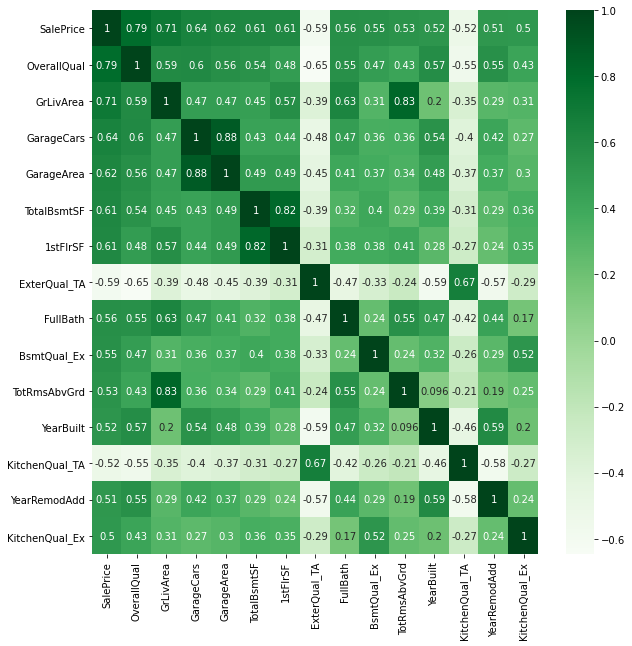

In [ ]:
# Abaixo podemos plotar esses dados num mapa de calor pra entender qual variável faz mais sentido com sales price
plt.figure(figsize=(10,10))
ax = sns.heatmap(dataset_house03[maior_corr].corr(),annot=True, cmap="Greens")

In [ ]:
# Atribuição da correlação no dataset05 considerando o dataset 3 como modelo inicial
# Esse dataset ficou com 1460 instancias e 15 colunas pois demos um fit nas variaveis que não contém correlação
# ao menos moderada

dataset_house05 = dataset_house03[corr[corr['SalePrice']>=0.5].index]

dataset_house05.shape

(1460, 15)

Avaliando modelos:


In [ ]:
# Avaliando modelo1

x = dataset_house01.drop(["SalePrice"],axis=1)
y=  dataset_house01.SalePrice

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle =True, random_state =1)

lr=linear_model.LinearRegression ()

# treinamento do modelo
model= lr.fit(x_train,y_train)
# Teste do modelo
test  = model.predict(x_test) 

# Resultado de R2 e MSE
print("R2/Score: \n", model.score(x_test, y_test))
print("MSE: \n", mean_squared_error(y_test, test))



R2/Score: 
 0.8890480258716851
MSE: 
 444531876.19645363


In [ ]:
# Avaliando o modelo 2

x = dataset_house02.drop(["SalePrice"],axis=1)
y=  dataset_house02.SalePrice

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle =True, random_state =1)

lr=linear_model.LinearRegression ()

# treinamento do modelo
model= lr.fit(x_train,y_train)
# Teste do modelo
test  = model.predict(x_test) 

# Resultado de R2 e MSE
print("R2/Score: \n", model.score(x_test, y_test))
print("MSE: \n", mean_squared_error(y_test, test))


R2/Score: 
 0.8112603479891508
MSE: 
 1346080511.0463905


In [ ]:
# Avaliando o modelo 3

x = dataset_house03.drop(["SalePrice"],axis=1)
y=  dataset_house03.SalePrice

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle =True, random_state =1)

lr=linear_model.LinearRegression ()

# treinamento do modelo
model= lr.fit(x_train,y_train)
# Teste do modelo
test  = model.predict(x_test) 

# Resultado de R2 e MSE
print("R2/Score: \n", model.score(x_test, y_test))
print("MSE: \n", mean_squared_error(y_test, test))

R2/Score: 
 0.8012603479891303
MSE: 
 106531876.19645083

In [ ]:
# Avaliando o modelo 4

x = dataset_house04.drop(["SalePrice"],axis=1)
y=  dataset_house04.SalePrice

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle =True, random_state =1)

lr=linear_model.LinearRegression ()

# treinamento do modelo
model= lr.fit(x_train,y_train)
# Teste do modelo
test  = model.predict(x_test) 

# Resultado de R2 e MSE
print("R2/Score: \n", model.score(x_test, y_test))
print("MSE: \n", mean_squared_error(y_test, test))

R2/Score: 
 0.8839308634363672
MSE: 
 506312425.25847703


In [ ]:
# Avaliando modelo 5

x = dataset_house05.drop(["SalePrice"],axis=1)
y=  dataset_house05.SalePrice

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle =True, random_state =1)

lr=linear_model.LinearRegression ()

# treinamento do modelo
model= lr.fit(x_train,y_train)
# Teste do modelo
test  = model.predict(x_test) 

# Resultado de R2 e MSE
print("R2/Score: \n", model.score(x_test, y_test))
print("MSE: \n", mean_squared_error(y_test, test))


R2/Score: 
 0.8490253145159453
MSE: 
 1076742908.1609337


Abaixo o resultado final:

A Modelo 1 e 2 a mediana não houve ganho em relação a média         
O menor resultado de R2 e MSE foram obitido o hot enconding  
O tratamento com z-score não houve ganho relativo utilizado o pré tratamento do modelo 2  
A aplicação da correlação no modelo 5 teve um bom MSE, entretanto o R2 ficou comprometido em relação aos demais modelos



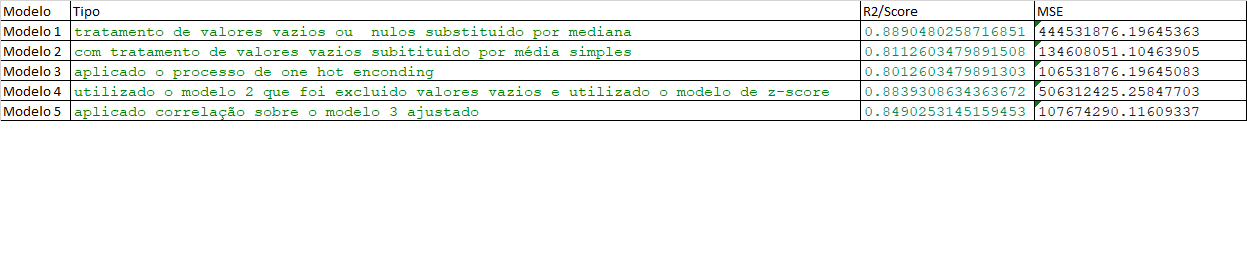